In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn

In [2]:
PRODUCTION_NAME = 'Production en Gwh'
ELEC_USED_NAME = 'Production utilisee (%)'

### Import Data

We start by importing the data

In [3]:
nuclear_path = 'Data/nuclear_production.csv'
nuclear_data = pd.read_csv(nuclear_path, delimiter=",")

In [4]:
nuclear_data.head(4)

,num,Year,Power plant,production/ used electricity
0,22298.0,1990,Total,electric production in Gwh
1,86.6,1990,Total,used electricity %
2,2540.0,1990,Beznau 1,electric production in Gwh
3,83.3,1990,Beznau 1,used electricity %


The data contains in fact two kinds of data: electric production and % electricity used. We want to split both kinds of data in separate dataframe and index them by 'Centrale' and then by year using a multiindex. This way it will be easy to plot and see the evolution of production for each centrale through years

In [5]:
# Reorder columns
re_cols = ['Power plant', 'Year', 'production/ used electricity', 'num']
nuclear_recols = nuclear_data[re_cols]
nuclear_recols.head(2)

,Power plant,Year,production/ used electricity,num
0,Total,1990,electric production in Gwh,22298.0
1,Total,1990,used electricity %,86.6


In [6]:
# Split the data in two categories: production and electricity used
def split_df(df):
    prod = nuclear_recols[::2].drop('production/ used electricity', axis=1)
    elec_used = nuclear_recols[1::2].drop('production/ used electricity', axis=1)
    return prod, elec_used

In [7]:
production_df, elec_used_df = split_df(nuclear_recols)

In [8]:
production_df.head(2)

,Power plant,Year,num
0,Total,1990,22298.0
2,Beznau 1,1990,2540.0


In [9]:
elec_used_df.head(2)

,Power plant,Year,num
1,Total,1990,86.6
3,Beznau 1,1990,83.3


In [19]:
# Create hierarchical index from a dataframe. cols are the columns that will become index, asc takes 1 or 0 per column
# whether you want to index in ascending order or not, valname is the name you want to give to the data
def index_by(cols, df, asc, valname):
    new_df = df.copy()
    new_df.set_index(cols, inplace = True)
    new_df.sort_index(level = cols, ascending = asc, inplace = True)
    new_df.columns = [valname]
    return new_df

In [20]:
prod_idxd = index_by(['Power plant', 'Year'], production_df, [1,1], PRODUCTION_NAME)
prod_idxd.head(3)

Production en Gwh
Power plant Year                   
Beznau 1    1990             2540.0
            1991             2474.0
            1992             2456.0

In [21]:
elec_idxd = index_by(['Power plant', 'Year'], elec_used_df, [1,1], ELEC_USED_NAME)
elec_idxd.head(3)

Production utilisee (%)
Power plant Year                         
Beznau 1    1990                     83.3
            1991                     81.2
            1992                     80.3

In [22]:
# Remove 'Total' column from df and return it
def remove_total(df):
    total = elec_idxd.loc['Total']
    df.drop('Total', inplace = True)
    return total

In [28]:
total_prod = remove_total(prod_idxd)

In [29]:
total_elec = remove_total(elec_idxd)

In [34]:
# Plots the dataframe values in two plots (half the data in each)
def plot_by_year(valname, df):
    df_unstacked = df.unstack().T.loc[valname]
    middle_idx = int(len(df_unstacked.columns)/2)
    split_val1 = df_unstacked.columns[middle_idx]
    split_val2 = df_unstacked.columns[middle_idx + 1]
    x = df_unstacked.loc[:, :split_val1]
    y = df_unstacked.loc[:, split_val2:]
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,5), sharey = True)
    plt.figure(); 
    x.plot(ax=ax1)
    y.plot(ax = ax2)
    #ax1.set_title('Sharing Y axis')

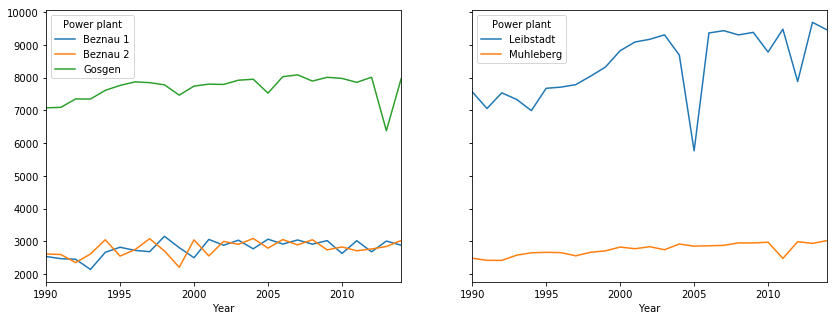

In [35]:
plot_by_year(PRODUCTION_NAME, prod_idxd)

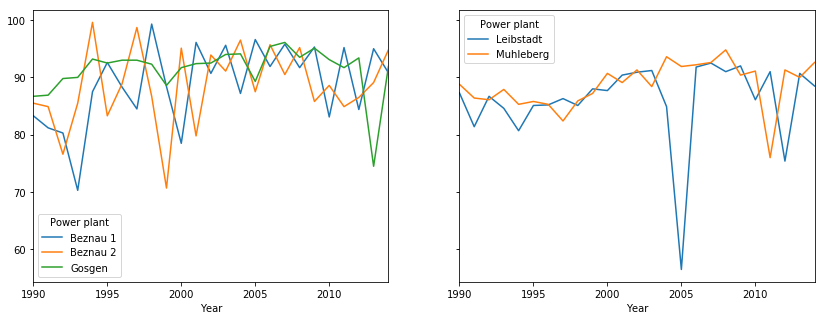

In [36]:
plot_by_year(ELEC_USED_NAME, elec_idxd)

We can explain the different peaks by looking in the [report](http://www.nuklearforum.ch/sites/default/files/media/Chronique_fr_2000_2005_0.pdf) of events related to Swiss power plants between 2000 and 2005 
For example, the biggest peak in the Leibstadt power plant is explained by the following quote:

Original quote in french
"(5043) 28 mars 2005 : une perturbation survenue à l’intérieur de l’alternateur entraîne un arrêt de la turbine de la
centrale nucléaire de Leibstadt. Le réacteur, qui n’est pas touché par l’événement, est ensuite mis à l’arrêt par l’équipe
d’exploitation."

Here is the list of the reports accessible from the [nuklearforum](http://www.nuklearforum.ch/fr/chronique_nucleaire) website  
[1975 - 1999](https://www.nuklearforum.ch/sites/default/files/media/Chronik_dt_fr_bis_1999.pdf)  
[2000 - 2005](http://www.nuklearforum.ch/sites/default/files/media/Chronique_fr_2000_2005_0.pdf)  
[2006 - 2011](http://www.nuklearforum.ch/sites/default/files/media/Chronik_fr_ab_2006_0.pdf)  
[2012 - 2013](https://www.nuklearforum.ch/sites/default/files/page/Chronik_fr_ab-01-01-2012%20bis%2031-12-2013.pdf)  
[2014](https://www.nuklearforum.ch/sites/default/files/page/Chronik_fr_des-01-01-2014.pdf)  
